In [61]:
import torch
import numpy as np

In [62]:
torch.cuda.is_available()

True

TENSORS

In [63]:
#tensor is a multi dim matrix consisting of elements of single data type
#tensor have default data type of float32
#tensors are more suitable for deep learning than numpy arrays


#python lists
my_list = [[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]]
print(my_list)

[[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14]]


In [64]:
#Np arrays
np1 = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])
print(np1)
np2 = np.random.rand(3,4)
print(np2)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]]
[[0.66256495 0.83579083 0.48206896 0.56825759]
 [0.27950976 0.41481424 0.55264376 0.43135088]
 [0.60846439 0.57120107 0.2974193  0.72116213]]


In [65]:
#tensors
tensor1 = torch.randn(3,4)

In [66]:
tensor1

tensor([[ 0.8494,  0.8841, -1.2248, -0.7448],
        [-1.0239, -0.4551, -0.1348, -2.0307],
        [ 1.4976,  1.0281,  0.6423,  0.1229]])

In [67]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [68]:
#create tensor outof numpy array
tensor_np = torch.tensor(np1)
tensor_np

tensor([[ 1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14]])

In [69]:
tensor_np.dtype

torch.int64

In [70]:
tensor1.dtype

torch.float32

In [71]:
tensor_3d.dtype

torch.float32

Tensor Operations

In [72]:
My_torch = torch.arange(10)


In [73]:
#reshape and view are used to reshape data
My_torch = My_torch.reshape(2,5)

In [74]:
My_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [75]:
#reshaping when number of items are unknown
My_torch2 = torch.arange(15)
My_torch2

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [76]:
My_torch2 = My_torch2.reshape(3,-1)
My_torch2

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [77]:
my_torch5 = torch.arange(10)
my_torch6 = my_torch5.reshape(2,5)

In [78]:
my_torch6

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [79]:
my_torch5[1] = 414
my_torch5

tensor([  0, 414,   2,   3,   4,   5,   6,   7,   8,   9])

In [80]:
my_torch6

tensor([[  0, 414,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

In [81]:
my_torch7 = torch.arange(10)
my_torch7

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
#grab a specific item
my_torch7[7]

tensor(7)

In [83]:
my_torch8 = my_torch7.reshape(5,2)
my_torch8

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [84]:
my_torch9=my_torch8[:,1]
my_torch10=my_torch9.reshape(-1,1)
my_torch10

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [85]:
#return column
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

Tensor math operations

In [86]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])
tensor_a.shape,tensor_b.shape

(torch.Size([4]), torch.Size([4]))

In [87]:
#addition
tensor_a+tensor_b

tensor([ 6,  8, 10, 12])

In [88]:
#addition long way
torch.add(tensor_a,tensor_b)

tensor([ 6,  8, 10, 12])

In [89]:
#subtraction
tensor_a-tensor_b

tensor([-4, -4, -4, -4])

In [90]:
#sutraction long way
torch.sub(tensor_a,tensor_b)

tensor([-4, -4, -4, -4])

In [91]:
#multiply
tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [92]:
#multiply long way
torch.mul(tensor_a,tensor_b)

tensor([ 5, 12, 21, 32])

In [93]:
#division
tensor_a/tensor_b

tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [94]:
#division long way
torch.div(tensor_a,tensor_b)

tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [95]:
#modulus
tensor_b%tensor_a

tensor([0, 0, 1, 0])

In [97]:
#modulus long way
torch.remainder(tensor_b,tensor_a)

tensor([0, 0, 1, 0])

In [101]:
#exponents
tensor_a**tensor_b

tensor([    1,    64,  2187, 65536])

In [102]:
#exponents long way
torch.pow(tensor_a,tensor_b)

tensor([    1,    64,  2187, 65536])

Creating a basic neural network model

In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [111]:
#create a model class that inherits nn.Module

class Model(nn.Module):
  #input layer is gonna have the 4 features of the flower ie sepal and petal width/height
  #input layer(4 features) --> hidden layer1(number of neurons) --> hidden layer2 (number of neurosn) --> output(3 classes of iris)
  def __init__(self,in_features=4, h1 = 8, h2 = 8 , out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [112]:
#pick a manual seed for randomization
torch.manual_seed(69)

#create model instance
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [124]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [125]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [126]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [127]:
df['species'] = df['species'].replace('setosa',0.0)
df['species'] = df['species'].replace('versicolor',1.0)
df['species'] = df['species'].replace('virginica',2.0)

<ipython-input-127-f2d7f6fde9b4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica',2.0)


In [128]:
df['species'].unique()

array([0., 1., 2.])

In [129]:
#train test split set x,y
X = df.drop('species',axis=1)
y = df['species']

In [130]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [131]:
X = X.values
y = y.values

In [132]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [134]:
from sklearn.model_selection import train_test_split

In [136]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 69)

In [139]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test) #longtensor converts data to int

In [141]:
#set the criterion of model to measure error
criterion = nn.CrossEntropyLoss()
#Choose Optimizers and learning rate
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [148]:
#train model
#decide how many epochs you want
epochs = 1000
losses = []
for i in range(epochs):
  #go forward and get prd
  y_pred = model.forward(X_train) # get predicted results

  #measure loss
  loss = criterion(y_pred,y_train) #comparing predicted vs ytrain

  #keep track of losses/errors
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0 :
    print(f"Epoch: {i} & Training loss {loss}")

  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 & Training loss 0.06373543292284012
Epoch: 10 & Training loss 0.0634404644370079
Epoch: 20 & Training loss 0.06315427273511887
Epoch: 30 & Training loss 0.06287664920091629
Epoch: 40 & Training loss 0.062607042491436
Epoch: 50 & Training loss 0.06234518066048622
Epoch: 60 & Training loss 0.06209076568484306
Epoch: 70 & Training loss 0.06184345856308937
Epoch: 80 & Training loss 0.061602961272001266
Epoch: 90 & Training loss 0.06136895343661308
Epoch: 100 & Training loss 0.06114126741886139
Epoch: 110 & Training loss 0.060919586569070816
Epoch: 120 & Training loss 0.060703687369823456
Epoch: 130 & Training loss 0.06049332767724991
Epoch: 140 & Training loss 0.06028829514980316
Epoch: 150 & Training loss 0.0600883848965168
Epoch: 160 & Training loss 0.05989346280694008
Epoch: 170 & Training loss 0.05970325320959091
Epoch: 180 & Training loss 0.05951763316988945
Epoch: 190 & Training loss 0.05933643877506256
Epoch: 200 & Training loss 0.059159550815820694
Epoch: 210 & Training lo

Text(0.5, 0, 'Epoch')

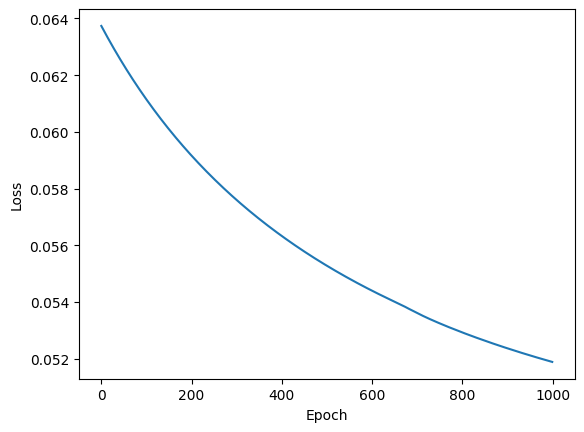

In [149]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [158]:
#testing the model using test data
test_loss = []
with torch.no_grad(): #this basically turns of back propagation as we are not updating weights while testing
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)
  test_loss.append(loss)
  print(test_loss)

[tensor(0.0194)]


In [166]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    if y_test[i] ==0:
      x = 'setosa'
    elif y_test[i] ==1:
      x = 'versicolor'
    else:
      x = 'virginica'

    print(f"{i+1}  {str(y_val)} \t {x} \t {y_val.argmax().item()}")

1  tensor([ 11.6404,  -3.3992, -22.5653]) 	 setosa 	 0
2  tensor([-2.9710,  6.6234, -2.1105]) 	 versicolor 	 1
3  tensor([ 10.6880,  -2.2360, -21.3187]) 	 setosa 	 0
4  tensor([-6.3812, -1.2609,  9.0982]) 	 virginica 	 2
5  tensor([ 10.3836,  -2.2913, -20.8111]) 	 setosa 	 0
6  tensor([ 13.2038,  -4.3240, -25.2882]) 	 setosa 	 0
7  tensor([-2.8612,  5.7314, -1.4927]) 	 versicolor 	 1
8  tensor([-6.8992,  0.0698,  8.6816]) 	 virginica 	 2
9  tensor([-5.4206,  3.4058,  3.9560]) 	 virginica 	 2
10  tensor([ 12.8443,  -4.0902, -24.6893]) 	 setosa 	 0
11  tensor([-5.0326,  2.1878,  4.4984]) 	 virginica 	 2
12  tensor([-7.6519, -0.4004, 10.1930]) 	 virginica 	 2
13  tensor([  9.7608,  -2.2979, -19.3193]) 	 setosa 	 0
14  tensor([-3.3161,  5.4313, -0.7335]) 	 versicolor 	 1
15  tensor([-6.3865, -0.0405,  8.0066]) 	 virginica 	 2
16  tensor([-3.1616,  6.1453, -1.3943]) 	 versicolor 	 1
17  tensor([-1.6037,  6.4553, -3.9491]) 	 versicolor 	 1
18  tensor([-6.8991, -0.7719,  9.4923]) 	 virginica 

In [167]:
#saving model
torch.save(model.state_dict(),'irismodel.pt')

In [168]:
new_model = Model()
new_model.load_state_dict(torch.load('irismodel.pt'))


<ipython-input-168-f7e323b863b3>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('irismodel.pt'))


<All keys matched successfully>

In [169]:
#make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)